# Flights Data Exploration Challenge

In this challge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [2]:
# Your code to explore the data
column_name = df_flights.columns.tolist()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis
### 1. Cleaning the data
   #### - Null ( missing values)

In [4]:
df_flights.shape

(271940, 20)

In [5]:
# Identify any null or missing data
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [6]:
pd.equal?

Object `pd.equal` not found.


In [7]:
# Let us see how those null column are impacting the departure delay column
import numpy as np
df_flights[["DepDelay", "DepDel15"]][df_flights.DepDel15.isnull()].describe()


,DepDelay,DepDel15
count,2761.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


In [8]:
# So all the empty value of DepDel15 have their DepDelay equal to 0 that means that they are not delay we will they replace
# the binary DepDel15 by 0 
df_flights.DepDel15.fillna(0, inplace=True)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

#### - Outliers: Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.


Text(0.5, 0, 'Value')

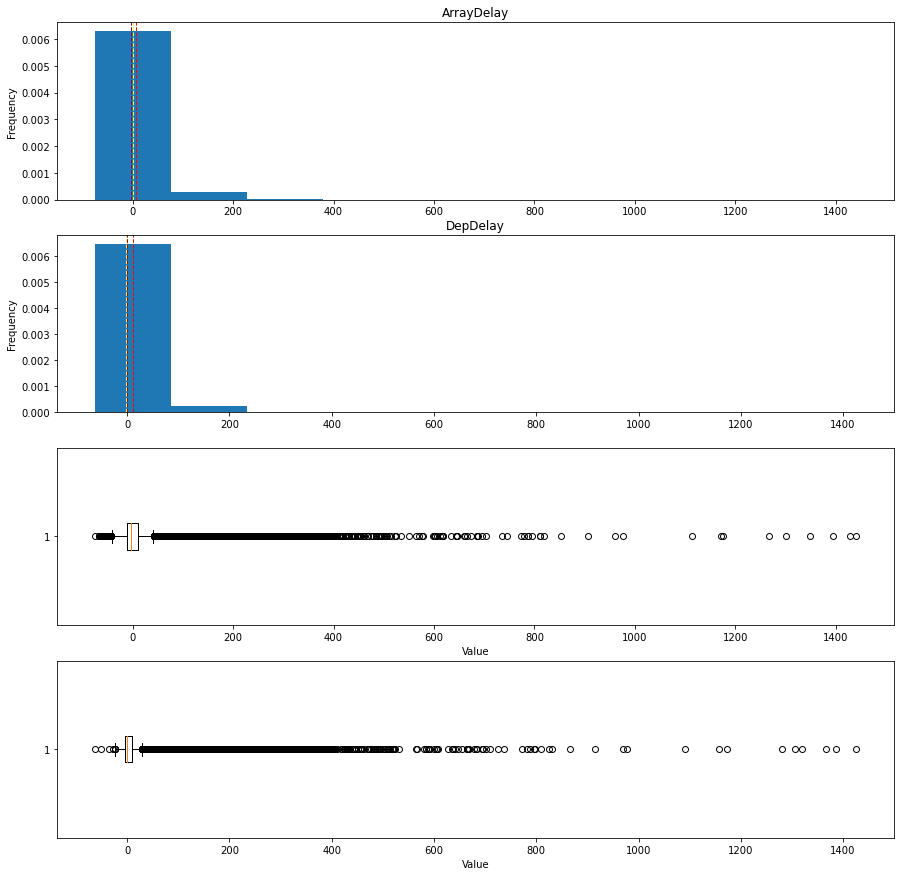

In [9]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,15))
ax1.hist(df_flights.ArrDelay, density = True)
ax1.axvline(df_flights.ArrDelay.mean(), color = "red", linestyle = "dashed", linewidth = 1)
ax1.axvline(df_flights.ArrDelay.median(), color = "purple", linestyle = "dashed", linewidth = 1)
ax1.axvline(df_flights.ArrDelay.mode()[0], color = "yellow", linestyle = "dashed", linewidth = 1)

ax1.set_title("ArrayDelay")
ax1.set_ylabel("Frequency")
ax2.hist(df_flights.DepDelay, density = True)
ax2.axvline(df_flights.DepDelay.mean(), color = "red", linestyle = "dashed", linewidth = 1)
ax2.axvline(df_flights.DepDelay.median(), color = "purple", linestyle = "dashed", linewidth = 1)
ax2.axvline(df_flights.DepDelay.mode()[0], color = "yellow", linestyle = "dashed", linewidth = 1)

ax2.set_title("DepDelay")
ax3.boxplot(df_flights.ArrDelay, vert= False)
ax2.set_ylabel("Frequency")
ax3.set_xlabel("Value")
ax4.boxplot(df_flights.DepDelay, vert = False)
ax4.set_xlabel("Value")



>- The plotting method above is good but for me it seemed fastidious so i tried another methods 

<ipython-input-10-921e3881a2b1>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

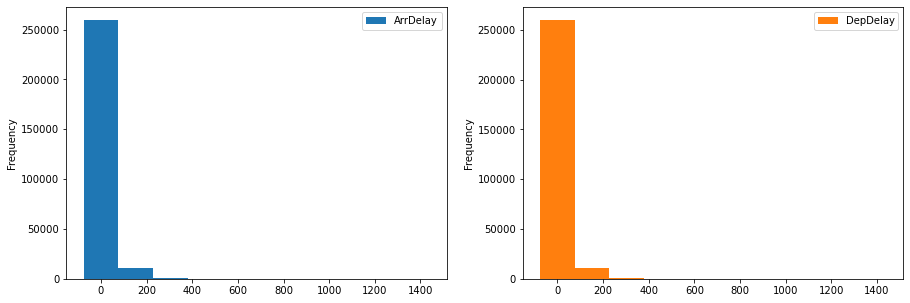

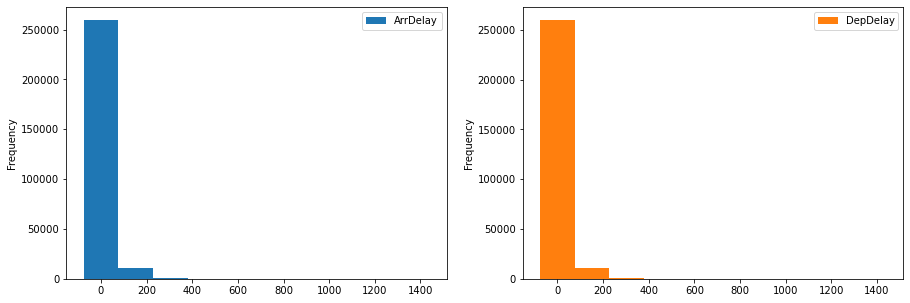

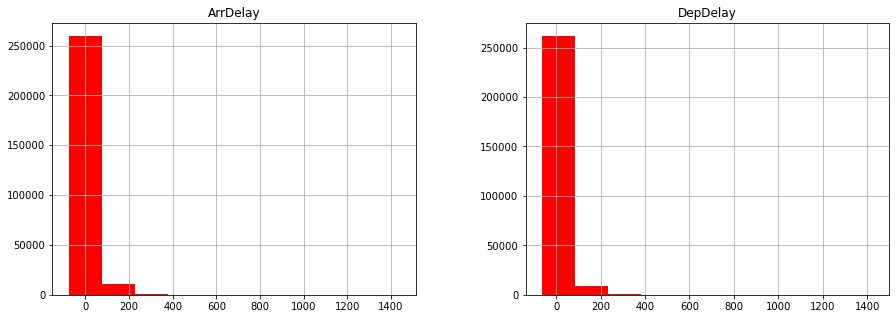

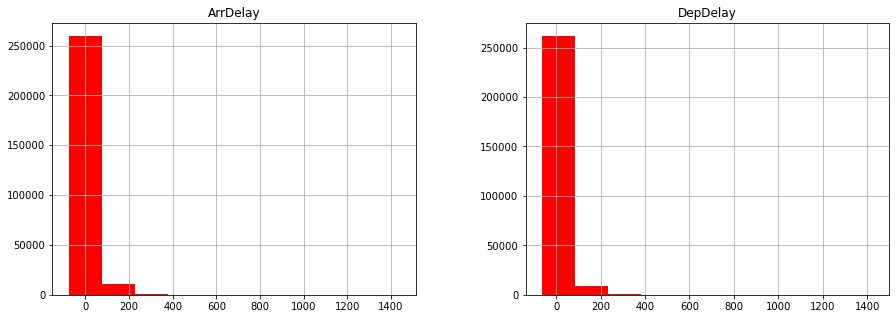

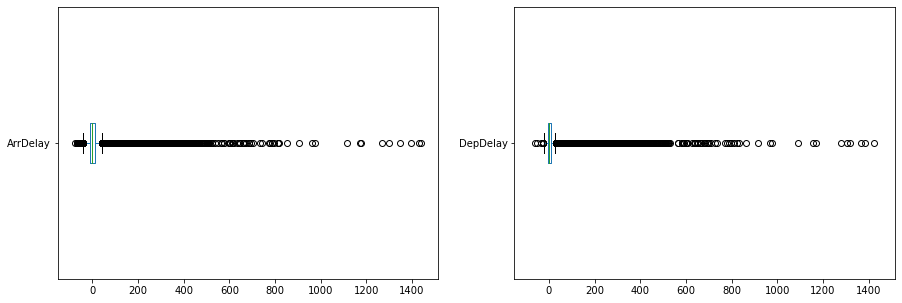

In [10]:
fig = plt.figure()

# multiples methods of plotting style a DataFrame
df_flights[["ArrDelay", "DepDelay"]].plot(kind = "hist", subplots = True, layout=(1, 2), figsize = (15, 5))
df_flights[["ArrDelay", "DepDelay"]].plot.hist(subplots = True, layout=(1, 2), figsize = (15, 5))
df_flights[["ArrDelay", "DepDelay"]].hist(layout=(1, 2), figsize = (15, 5), color = "red") # subplot is implicite
df_flights.hist(["ArrDelay", "DepDelay"], layout=(1, 2), figsize = (15, 5), color = "red") # subplot is implicite

# lets use one method for boxplot
df_flights[["ArrDelay", "DepDelay"]].plot.box(subplots = True, layout=(1, 2), figsize = (15, 5), vert = False)

fig.show()

>- They are a lot of Outliers. Let us trim outliers based on 15% and 85% percentiles (one methods amongst many -z_score etc)
>- This will remove all the elt that lie in the lowest quantile and the highest quantile.

In [11]:
# Outlier for ArrDelay
df_flights = df_flights[df_flights.ArrDelay > df_flights.ArrDelay.quantile(0.15)]
df_flights = df_flights[df_flights.ArrDelay < df_flights.ArrDelay.quantile(0.85)]



In [14]:
# Outliers for DepDelay
df_flights = df_flights[df_flights.DepDelay > df_flights.DepDelay.quantile(0.15)]
df_flights = df_flights[df_flights.DepDelay < df_flights.DepDelay.quantile(0.85)]

<ipython-input-15-cc8b623a39dd>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

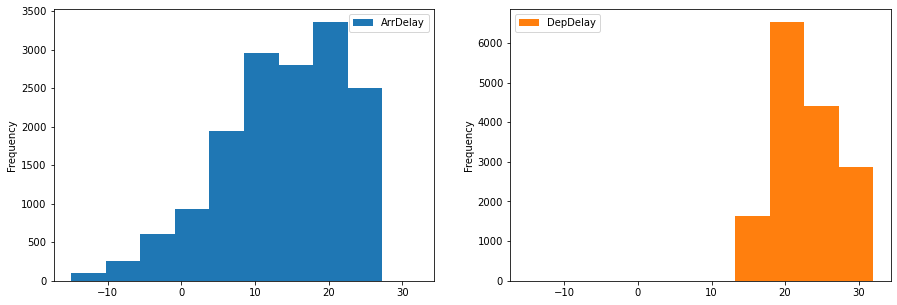

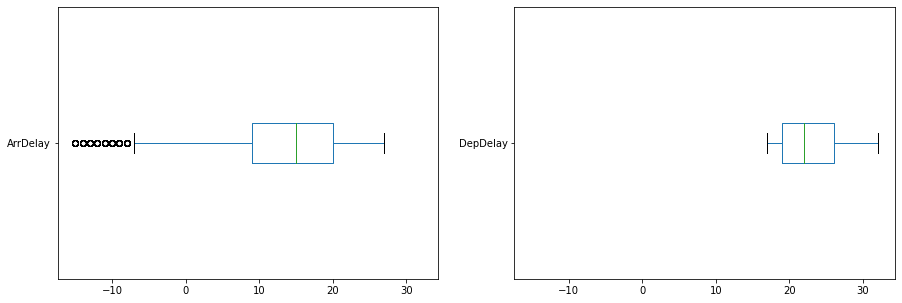

In [15]:
fig = plt.figure()

# multiples methods of plotting style a DataFrame
df_flights[["ArrDelay", "DepDelay"]].plot(kind = "hist", subplots = True, layout=(1, 2), figsize = (15, 5))

# lets use one method for boxplot
df_flights[["ArrDelay", "DepDelay"]].plot.box(subplots = True, layout=(1, 2), figsize = (15, 5), vert = False)

fig.show()

>- now we have better data 

## 2. Explore the cleaned data.
###    - View summary statistics for the numeric fields in the dataset.


In [114]:
# First let us select numeric variable 
numerical_columns = df_flights.select_dtypes(np.number)

# Then let us display them
numerical_columns.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,15444.0,15444.000000,15444.000000,15444.000000,15444.000000,15444.000000,15444.000000,15444.000000,15444.0,15444.000000,15444.000000,15444.000000,15444.000000
mean,2013.0,6.971057,16.065009,3.903587,12690.346672,12849.593564,1497.570578,22.819153,1.0,1662.657084,13.878205,0.517483,0.000842
std,0.0,1.937642,8.625106,1.953309,1498.650223,1496.708368,421.542604,4.394532,0.0,477.166205,8.396838,0.499710,0.029002
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,5.000000,17.000000,1.0,1.000000,-15.000000,0.000000,0.000000
25%,2013.0,5.000000,9.000000,2.000000,11292.000000,11298.000000,1200.000000,19.000000,1.0,1352.000000,9.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12953.000000,1530.000000,22.000000,1.0,1735.000000,15.000000,1.000000,0.000000
75%,2013.0,8.000000,23.000000,5.000000,13930.000000,14107.000000,1830.000000,26.000000,1.0,2030.000000,20.000000,1.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,32.000000,1.0,2359.000000,27.000000,1.000000,1.000000


###    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.

In [133]:
numerical_columns[["DepDelay", "ArrDelay"]].describe()

,DepDelay,ArrDelay
count,15444.000000,15444.000000
mean,22.819153,13.878205
std,4.394532,8.396838
min,17.000000,-15.000000
25%,19.000000,9.000000
50%,22.000000,15.000000
75%,26.000000,20.000000
max,32.000000,27.000000


###    - Use statistics, aggregate functions, and visualizations to answer the following questions:
    - *What are the average (mean) departure and arrival delays?*


In [119]:
df_flights.DepDelay.mean(), df_flights.ArrDelay.mean()

(22.81915306915307, 13.878205128205128)

    - *How do the carriers compare in terms of arrival delay performance?*


In [141]:
nbr_delay_carrier = df_flights.groupby("Carrier").ArrDelay.agg(np.count_nonzero)
nbr_delay_carrier.sort_values(ascending = False)

Carrier
WN    5503
AA    1655
UA    1638
DL    1553
EV     767
US     691
OO     630
MQ     629
B6     608
FL     577
9E     270
YV     196
F9     190
AS     153
VX     145
HA      30
Name: ArrDelay, dtype: int64

>- The Worst Carriers is WN they have a lot of delay!!!!!!!

    - *Is there a noticable difference in arrival delays for different days of the week?*


In [158]:
nbr_delay_carrier_perdays = df_flights.groupby(["DayOfWeek"]).ArrDelay.agg(np.count_nonzero)
nbr_delay_carrier_perdays.describe()

count       7.000000
mean     2176.428571
std       317.896135
min      1605.000000
25%      2054.500000
50%      2197.000000
75%      2382.500000
max      2559.000000
Name: ArrDelay, dtype: float64

<AxesSubplot:xlabel='DayOfWeek'>

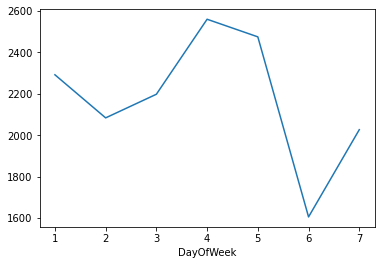

In [146]:
nbr_delay_carrier_perdays.plot()

>- Clearing we can see that on saturday there is less delay in arrival that in this other days

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

<Figure size 432x288 with 0 Axes>

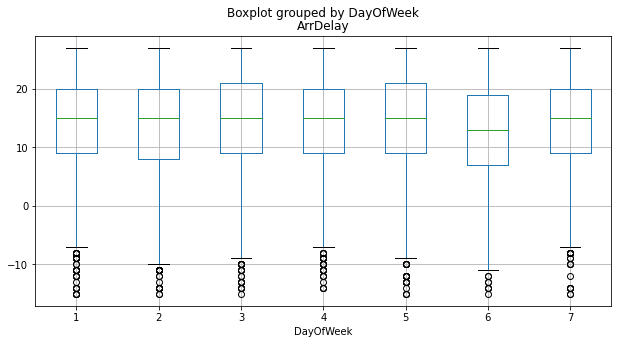

In [204]:
fig = plt.figure()
df_flights.boxplot('ArrDelay', by = 'DayOfWeek', figsize = (10, 5))

- Which departure airport has the highest average departure delay?


In [159]:
df_flights.head(2)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
16,2013,10,31,4,MQ,11057,Charlotte Douglas International,Charlotte,NC,12953,LaGuardia,New York,NY,1630,28,1.0,1830,26,1,0
28,2013,7,18,4,F9,11292,Denver International,Denver,CO,13871,Eppley Airfield,Omaha,NE,2000,29,1.0,2222,25,1,0


In [205]:
df_flights.groupby("OriginAirportName").DepDelay.mean().sort_values('DepDelay', ascending = False)

ValueError: No axis named DepDelay for object type Series

- Do late departures tend to result in longer arrival delays than on-time departures?


In [166]:
df_flights[["DepDelay", "ArrDelay"]].corr()

,DepDelay,ArrDelay
DepDelay,1.000000,0.329457
ArrDelay,0.329457,1.000000


In [167]:
- Which route (from origin airport to destination airport) has the most late arrivals?


Object `arrivals` not found.


- Which route (from origin airport to destination airport) has the most late arrivals

In [187]:
pd.concat([df_flights.OriginAirportName, df_flights.DestAirportName])
# route.drop_duplicates(inplace = True)


16                          Charlotte Douglas International
28                                     Denver International
92                            Buffalo Niagara International
96                  Norman Y. Mineta San Jose International
103                            Chicago Midway International
                                ...                        
271809                      Southwest Florida International
271824             Hartsfield-Jackson Atlanta International
271875                 George Bush Intercontinental/Houston
271895                     Phoenix Sky Harbor International
271937    Baltimore/Washington International Thurgood Ma...
Length: 30888, dtype: object